<a href="https://colab.research.google.com/github/changtimwu/colabbooks/blob/main/torchtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import torch as T
import torchvision.models as models
import torchvision.transforms as transforms

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print(T.__version__)
print(T.cuda.get_device_name(0))

1.9.0+cu111
Tesla K80


In [47]:
resnet = models.resnet50(pretrained=True).cuda()
_ = resnet.eval()

vgg = models.vgg16(pretrained=True).cuda()
_ = vgg.eval()

In [48]:

trs1 = transforms.Compose([transforms.RandomResizedCrop(224), 
                           transforms.ToTensor(), 
                           transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                std=[0.229, 0.224, 0.225])])

trs2 = transforms.Compose([transforms.RandomResizedCrop(224), 
                           transforms.ToTensor()])

In [49]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
#get file list
nbroot='/content/drive/MyDrive/Colab Notebooks/'
import glob
picdir = nbroot+"/peter_album/test1/*.jpg"
picfnlist = glob.glob(picdir)




In [51]:
#get label
import json
labelf = open( nbroot+'imagenet-simple-labels.json')
classes = json.load(labelf)
print(classes)
 

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead shark', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'American robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'American dipper', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'fire salamander', 'smooth newt', 'newt', 'spotted salamander', 'axolotl', 'American bullfrog', 'tree frog', 'tailed frog', 'loggerhead sea turtle', 'leatherback sea turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'green iguana', 'Carolina anole', 'desert grassland whiptail lizard', 'agama', 'frilled-necked lizard', 'alligator lizard', 'Gila monster', 'European green lizard', 'chameleon', 'Komodo dragon', 'Nile crocodile', 'American alligator', 'triceratops', 'worm snake', 'ring-necked snake', 'eastern hog-nosed snake', 'smooth green snake', 'kingsnake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'African rock p

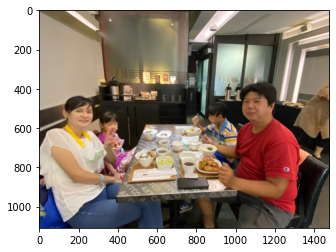

restaurant(14.57),dining table(13.54),bakery(11.96),plate(10.87),tray(9.06)


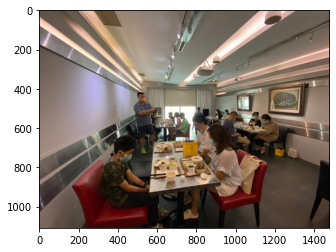

restaurant(13.16),library(10.84),dining table(9.16),bakery(9.09),grocery store(8.67)


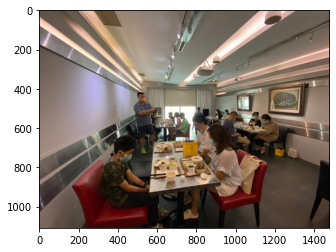

restaurant(13.56),library(12.48),bookstore(9.25),grocery store(8.81),shoe store(8.79)


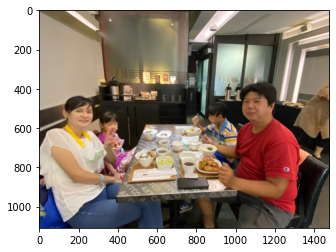

candle(9.56),potter's wheel(7.61),bakery(7.49),tray(7.22),ice pop(6.79)


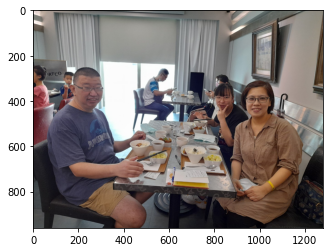

library(9.64),dining table(9.31),desk(9.30),notebook computer(8.96),restaurant(8.74)


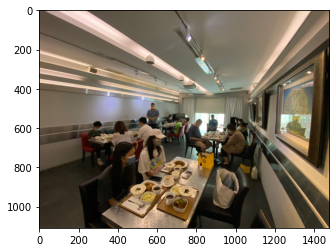

restaurant(14.26),grocery store(9.63),library(9.55),bakery(8.89),high-speed train(8.28)


In [52]:
def label_top1( clsvec):
    cid = np.argmax( clsvec, 1)[0]
    return classes[cid]
     
def label_topn( clsary, tn):
    idxesofmax = (-clsary).argsort()[0][:tn].tolist()
    strs = [  '{}({:.2f})'.format( classes[idx], clsary[0][idx] ) for idx in idxesofmax ]
    return ','.join( strs)
      

def run_model(model, img, trs):
    inp = trs(img)
    inp = inp.view((1, )+tuple(inp.shape))
    inp = inp.cuda()    
    out = model(inp)
    out = out.detach().cpu().numpy()    
    return out

N = 6
for ffn in picfnlist[:N]:
    img = Image.open( ffn )
    
    plt.figure()
    plt.imshow(img)
    plt.show()
    
    out_res1 = run_model(resnet, img, trs1)
    #out_res2 = run_model(resnet, img, trs2)
    print('{}'.format( label_topn( out_res1,5)))
    